In [3]:
###Exploratory Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df =pd.read_csv('winequalityN.csv',sep=',')
df.head()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
###To show total columns and total rows
df.shape


(6497, 13)

In [5]:
###To check corresponding data types , along with finding whether they
### they contain null values or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [8]:
###describe function in pandas to show various summary statistics(including count , mean , standard deviation, minimum and maximum values and quantiles)
###Descriptive Statistics Analysis parts : has two analysis (uni-variate and bivariate) analysis
# here shows univariate descriptive analysis( measure of central tendancy , measure of spread , measure of symmetry)
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


After doing this , then can see mean and median(50%) values are not so difference
However , can see (residual sugar , free sulfur dioxide , total sulfur dioxide ) column has very much difference 75% percentile value and maximun values 
So , it might have an outlier value due to second factor

In [9]:
###in this dataset,quality column has categorical value

df.quality.unique()


array([6, 5, 7, 8, 4, 3, 9])

Target variable/dependent variable is discrete and categorical in nature
"quality" score scale ranges between from 1 to 10 ; where 1 being poor and 100 being the best
1,2 & 10 quality ratings are not given by any observation , only scores obtained are between 3 to 9

In [10]:
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

This tell us vote count of each quality score in descending order
"qualit" has most values concentrated in the categories 5,6 and 7.
only a few observations made for the categories 3 and 9.


Python has a visualization library , seaborn which build on top of matplotlib and provides very attractive statistical graphs in order to perform both univariate and multivariate analysis

To use linear regression for modelling , its necessary to remove correlated variables to improve our model.

In [11]:
####Bi- variate Descriptive Statistic Analysis 
##mostly used in correlation but don't use covariance

df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.038729


To get correlation

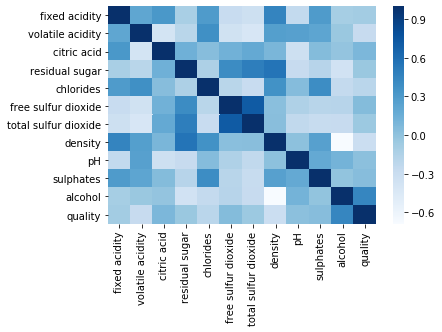

In [12]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues',annot=False)

Dark shades represent positive correlation while lighter shades  represents negative correlation
If we set annot =True, we will get values by which features are correlated to each other in grid-cells

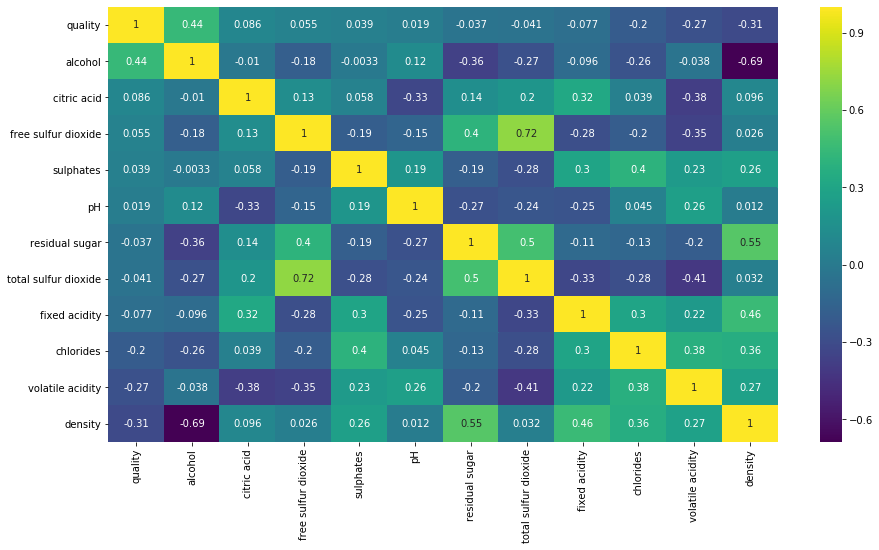

In [28]:
##Quality correlation matrix
k=13 ##number of variables for heatmap
cols=df.corr().nlargest(k,'quality')['quality'].index
cm=df[cols].corr()
plt.figure(figsize=(15,8))
sns.heatmap(cm,annot=True,cmap='viridis')


Here we can infer that 'density' has strong positive correlation with  'residual sugar'   whereas it has strong negative correlation  with  "alcohol"
"free sulphur dioxide" and "critic acid" has almost no correlation with "quality"
Since correlation is zero we can infer there is no linear relationship between these two predictors . However , it is safe to drop these features in case we are applying linear regression model to the dataset


To Check Outliers

TypeError: cannot perform reduce with flexible type

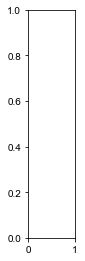

In [13]:
l=df.columns.values
number_of_columns=13
number_of_rows=len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows+1,number_of_columns,i+1)
    sns.set_style("whitegrid")
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

To Check distribution-skewness


In [14]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
# for i in range(0,len(l)):
#     plt.subplot(number_of_rows+1,number_of_columns,i+1)
#     sns.distplot(df[l[i]],kde=True)

<Figure size 1872x4652.31 with 0 Axes>

<Figure size 1872x4652.31 with 0 Axes>